In [1]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [3]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["mouth"]

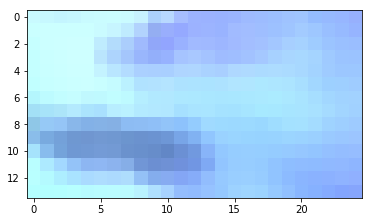

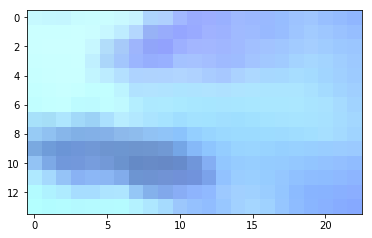

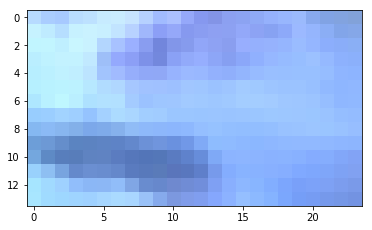

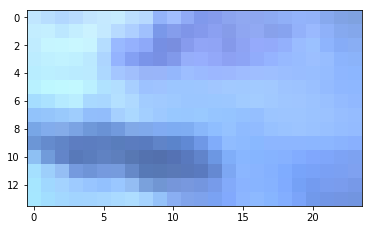

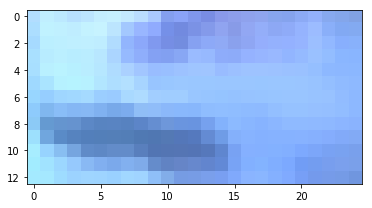

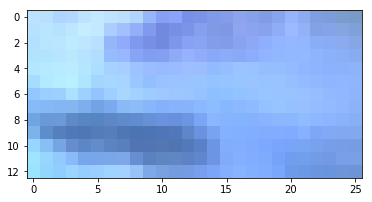

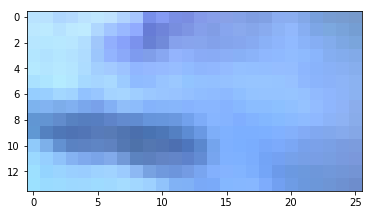

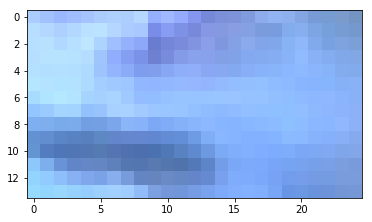

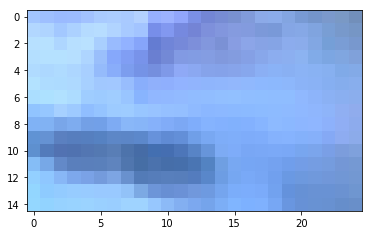

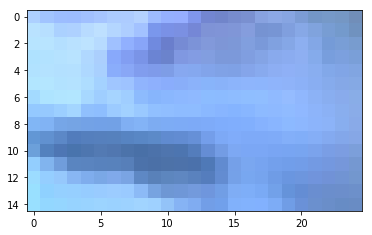

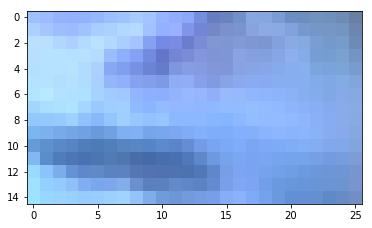

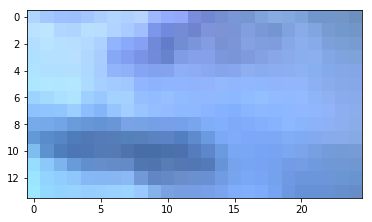

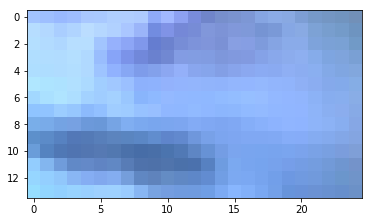

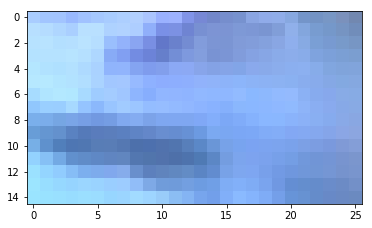

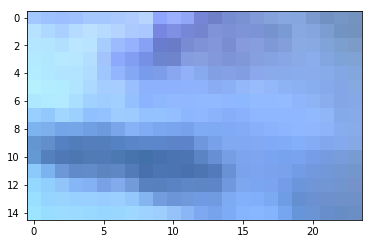

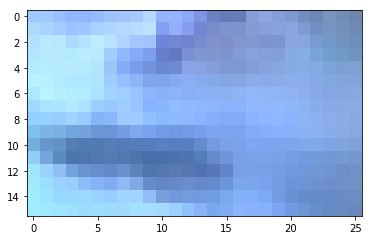

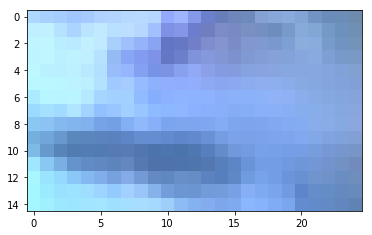

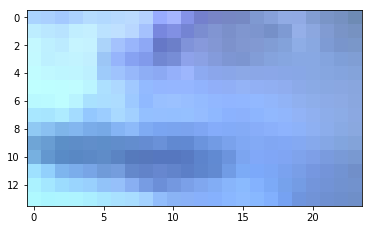

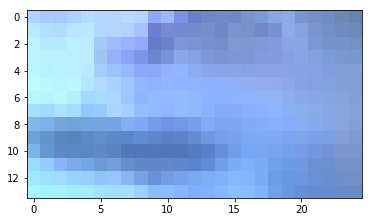

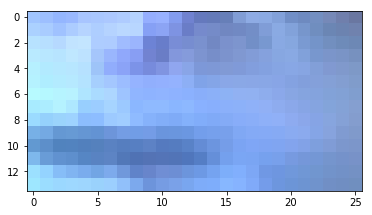

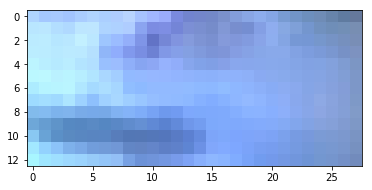

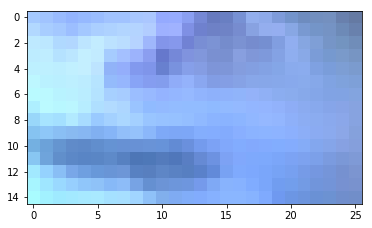

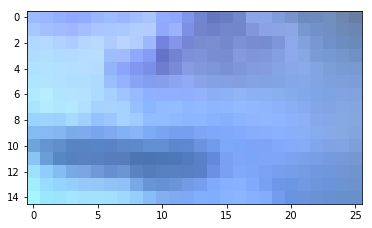

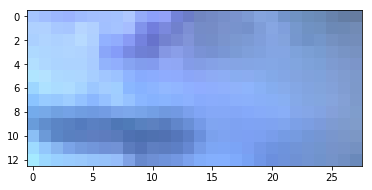

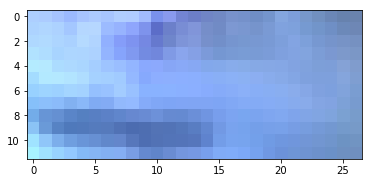

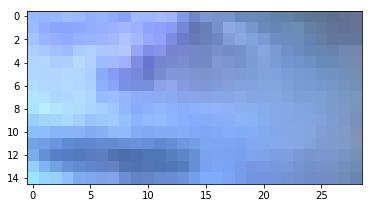

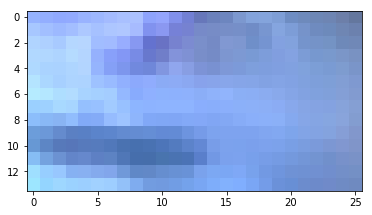

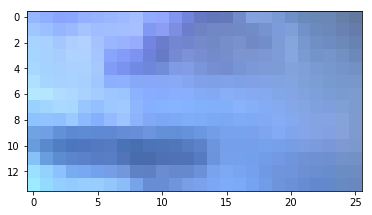

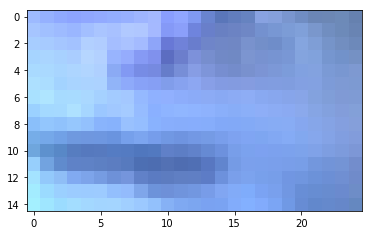

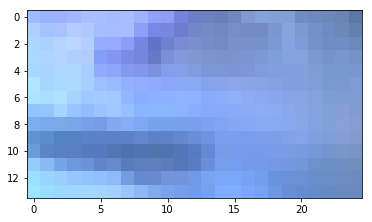

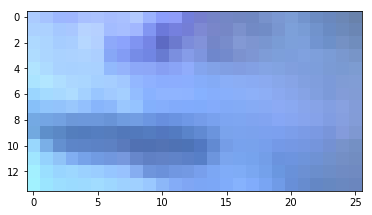

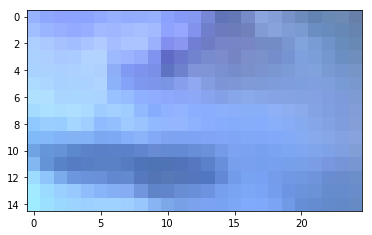

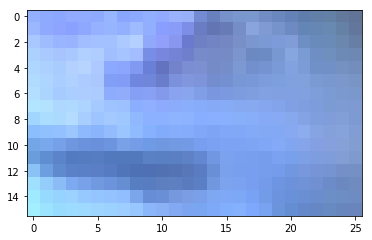

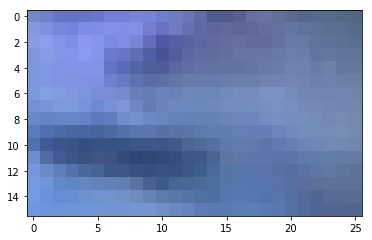

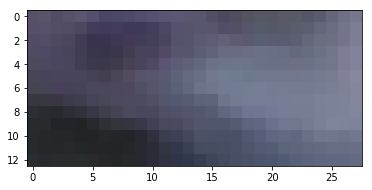

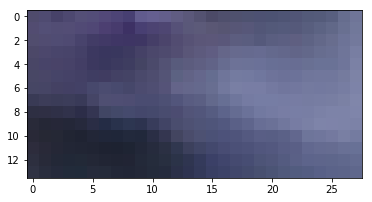

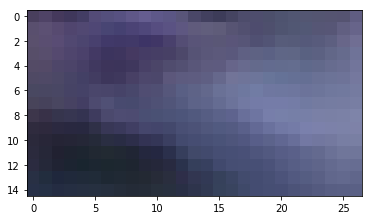

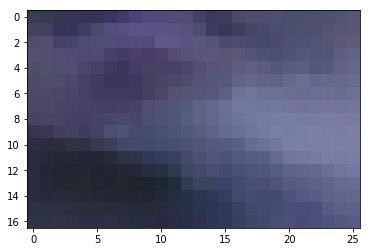

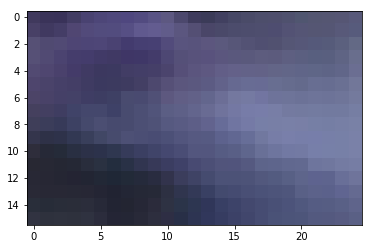

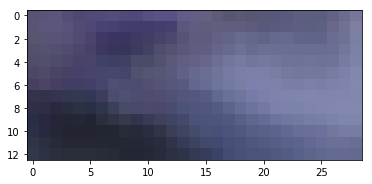

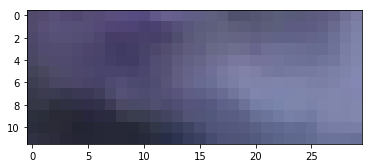

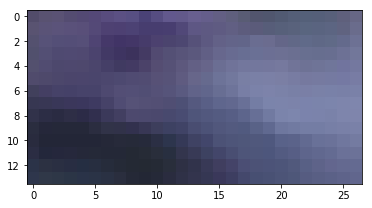

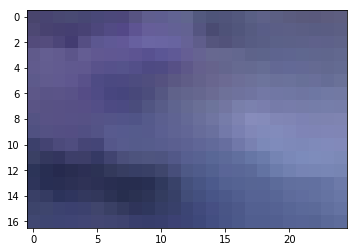

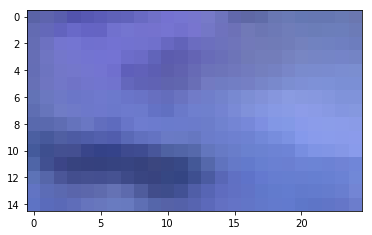

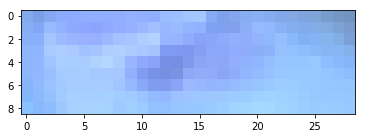

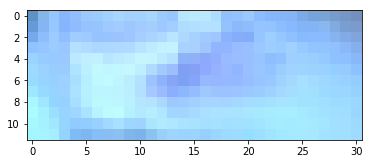

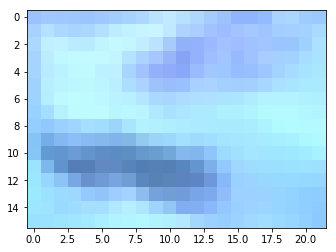

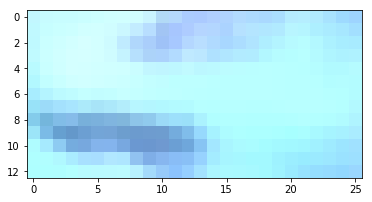

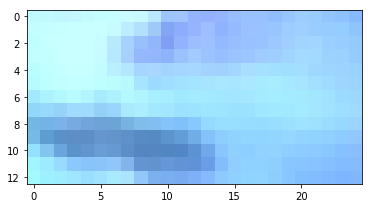

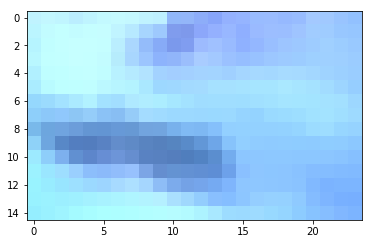

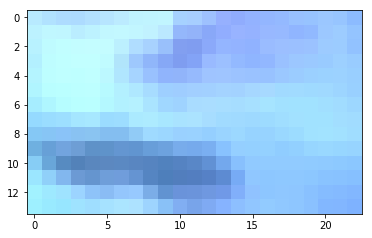

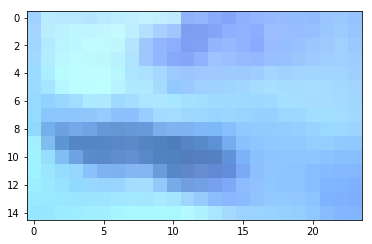

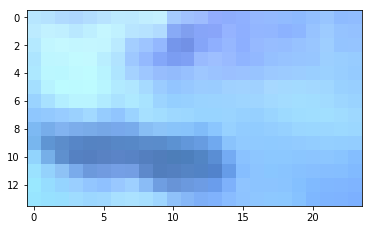

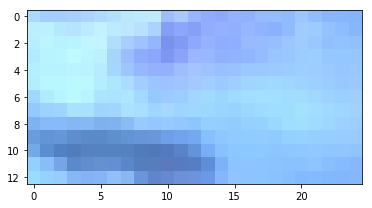

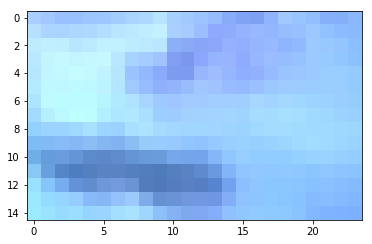

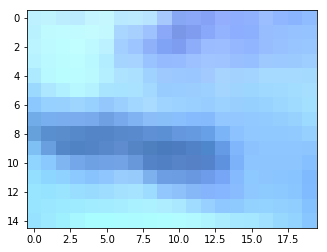

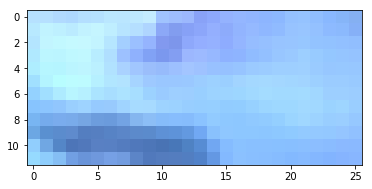

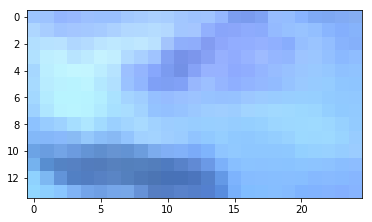

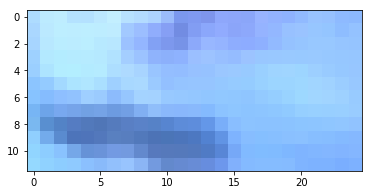

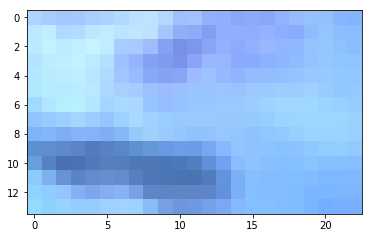

In [ ]:
cap=cv2.VideoCapture(0)
flag=0
co = 836
while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    subjects = detect(gray, 0)
    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)#converting to NumPy Array
        mouth = shape[lStart:lEnd]
        x_min = min(mouth[:,1])
        x_max = max(mouth[:,1])
        y_min = min(mouth[:,0])
        y_max = max(mouth[:,0])
        plt.imshow(frame[x_min:x_max, y_min:y_max,:])
        plt.show()
        cv2.imwrite("right-" + str(co) + ".jpg", frame[x_min:x_max, y_min:y_max,:])
        co += 1
        
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break